In [1]:
import adddeps
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
from collections import defaultdict
import datetime
import importlib

from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm

import multiprocessing
from multiprocessing import Pool, cpu_count

import sys, os
from utils.utils import plot_mean_std, delete_dfs, smoothen, concat, df_round_time
from utils.ACfunctions import AC


import scipy.optimize

import re 
matplotlib.rcParams["figure.dpi"] = 150
# matplotlib.rcParams["axes.grid"] = True

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
mathematica_exports = "/home/ashmat/Desktop/ashmat/mathematica_exports/"
files = sorted([line for line in os.listdir(mathematica_exports) 
                if re.match(r"^.+\.h5$", line) is not None])
print("\n".join(map(str,enumerate(files))))

(0, 'ER3.600-523-0.0374-205000-(1560).h5')
(1, 'ER3.610-523-0.0374-205000-(596).h5')
(2, 'ER3.630-523-0.0312-205000-(1199).h5')
(3, 'ER3.631-523-0.0780-205000-(446).h5')
(4, 'ER3.632-523-0.0920-205000-(455).h5')
(5, 'ER300.15-523-0.0195-205000-(1592).h5')
(6, 'ER300.25-523-0.0228-205000-(1594).h5')
(7, 'ER300.35-523-0.0258-205000-(1455).h5')
(8, 'ER300.45-523-0.0283-205000-(1541).h5')
(9, 'ER300.55-523-0.0312-205000-(1515).h5')
(10, 'ER300.6-523-0.0155-205000-(1553).h5')
(11, 'ERlong-199-0.0285-705000-(813).h5')
(12, 'ERlong-523-0.0374-205000-(1560).h5')
(13, 'ERlong-523-0.0374-205000-(575).h5')
(14, 'ERlong-523-0.0374-205000-(596).h5')
(15, 'ERlong-523-0.0380-705000-(1200).h5')
(16, 'ERlong-523-0.0380-705000-(456).h5')
(17, 'ERlong-523-0.0380-705000-(598).h5')


In [3]:
df = pd.read_hdf(os.path.join(mathematica_exports,  
                              files[15]))
a = 0.2
e = 0.0374
eps = e**2 / 4

In [4]:
df2 = pd.read_hdf(os.path.join(mathematica_exports,  
                              'ER3.632-523-0.0920-205000-(455).h5'))
a = 0.2
e = 0.092
eps = e**2 / 4

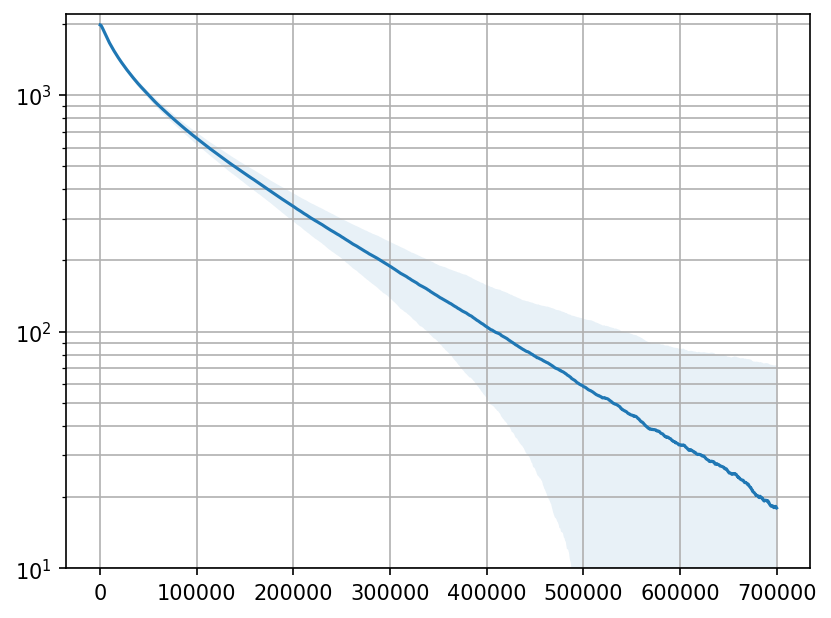

In [9]:
df["L"].plot()
plt.fill_between(df.index, df["L"]+df["Lstd"], df["L"]-df["Lstd"], alpha=0.1)



# df = df2
# df["L"].plot()
# plt.fill_between(df.index, df["L"]+df["Lstd"], df["L"]-df["Lstd"], alpha=0.3)

plt.yscale("log")
plt.ylim(10,2200)
plt.grid(which="both", axis="both")

In [6]:
df["Lstd"].loc[15000:].mean()

48.03281429558277

In [60]:
( (2 * df["E"].iloc[0]**2) / (9 * a**2 * 523) )**0.5

53.90397650561515

In [44]:
slope, _ = np.polyfit(df.index, np.log(df["L"]), deg=1)

/home/ashmat/miniconda3-vesta/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.


LinAlgError: SVD did not converge in Linear Least Squares

In [22]:
gamma = -4 * a**2 * eps**2 / slope; gamma

0.0036593937686622076

In [23]:
tau_h = gamma / a**2 / 2 ; tau_h

0.045742422108277586

In [26]:
tau_L = gamma / ( 4 * a**2 * (0.25 * 0.0312**2)**2)

In [27]:
tau_L

386180.88025685406

In [28]:
e_new = ( 4 * gamma / (a**2 * 5e3))**(1/4) ; e_new

0.09249319572274967

In [21]:
gamma

0.0036593937686622076

In [161]:
[line for line in os.listdir(mathematica_exports) if "ERlong" in line]

['ERlong-523-0.0374-205000-(575).h5.plus.csv',
 'ERlong-523-0.0380-705000-(456).h5',
 'ERlong-523-0.0380-705000-(598).h5',
 'ERlong-523-0.0374-205000-(575).h5.imgs',
 'ERlong-523-0.0374-205000-(575).h5',
 'ERlong-199-0.0285-705000-(813).h5',
 'ERlong-523-0.0374-205000-(596).h5',
 'ERlong-523-0.0380-705000-(456).h5.csv',
 'ERlong-523-0.0374-205000-(575).h5.csv',
 'ERlong-523-0.0374-205000-(1560).h5']

In [208]:
files2 = []
for file in files:
    fa = re.findall(r"^.+\((\d+)\)\.h5$", file)
    if len(fa)>0 and int(fa[0]) > 1400:
        files2.append(file)
print("\n".join(files2))

ER300.15-523-0.0195-205000-(1592).h5
ER300.25-523-0.0228-205000-(1594).h5
ER300.35-523-0.0258-205000-(1455).h5
ER300.45-523-0.0283-205000-(1541).h5
ER300.55-523-0.0312-205000-(1515).h5
ER300.6-523-0.0155-205000-(1553).h5


In [211]:
names = files2.copy()
names += ["ERlong-523-0.0380-705000-(456).h5", "ERlong-523-0.0374-205000-(575).h5"]

In [212]:
names

['ER300.15-523-0.0195-205000-(1592).h5',
 'ER300.25-523-0.0228-205000-(1594).h5',
 'ER300.35-523-0.0258-205000-(1455).h5',
 'ER300.45-523-0.0283-205000-(1541).h5',
 'ER300.55-523-0.0312-205000-(1515).h5',
 'ER300.6-523-0.0155-205000-(1553).h5',
 'ERlong-523-0.0380-705000-(456).h5',
 'ERlong-523-0.0374-205000-(575).h5']

In [195]:
names = [
 'ER300.15-523-0.0195-205000-(884).h5',
 'ER300.25-523-0.0228-205000-(614).h5',
 'ER300.35-523-0.0258-205000-(545).h5',
 'ER300.45-523-0.0283-205000-(611).h5',
 'ER300.55-523-0.0312-205000-(827).h5',
 'ER300.6-523-0.0155-205000-(789).h5',

    "ERlong-523-0.0380-705000-(456).h5",
"ERlong-523-0.0374-205000-(575).h5"
]


['0.0228']

In [213]:
items = [
    {"sim":pd.read_hdf(os.path.join(mathematica_exports, name)),
        "gamma":pd.read_csv(os.path.join(mathematica_exports, name+".csv"), 
            header=None).set_axis(["time","noneq", "_", "quasieq"], axis=1).set_index("time")}
    for name in tqdm(names)]
     

  0%|          | 0/8 [00:00<?, ?it/s]

In [214]:
def get_subdf(df, t, wide):
    return df.loc[t-wide/2:t+wide/2]

In [215]:
def get_gamma(df, t, wide, a, eps):
    subdf = get_subdf(df, t, wide)
    O = subdf["T"].mean()
    slope, _ = np.polyfit(subdf.index.values, subdf["O"].values, 1)
    gamma = -4 * a**2 * eps**2 * O * (3* a**2 - O**2) / (3* a**2 + O**2) / slope
    return gamma

In [216]:
a = 0.2
eps = 0.0283**2/4
item = items[3]

In [239]:
df_gam.index[-1]-df_gam.index[-2]

5000.0

In [240]:
df_sim.index[-1]

200000.0

In [248]:
for name, item in zip(tqdm(names), items):
    ecc = float(re.findall(r"^.+\-\d+\-([\d\.]+)\-\d+\-\(\d+\).h5$",name)[0])
    eps = ecc**2/4
    a = 0.2
    
    
    df_sim, df_gam = item["sim"], item["gamma"]
    T = []
    O = []
    L = []
    fromL = []
    wide = 500
    for i in range(len(df_gam.index)):
        t = df_gam.index[i]
        t_left = df_gam.index[i-1] if i > 0 else 0
        t_right = df_gam.index[i+1] if i < len(df_gam.index)-1 else df_sim.index[-1]
        
        fact = 4
        t_left = t - (t-t_left) * fact
        t_right = t + (t_right-t) * fact
        
        
        
        subdf =get_subdf(df_sim, t, wide)
        T.append(subdf["T"].mean())
        O.append(subdf["O"].mean())
        L.append(subdf["L"].mean())
        
        subdf = df_sim.loc[t_left: t_right]
        slope,_ = np.polyfit(subdf["L"].index,np.log(subdf["L"]),1)
        fromL.append(-4 * a**2 * eps**2 / slope)
        
    df_gam["T"] = T
    df_gam["O"] = O
    df_gam["L"] = L
    df_gam["fromL"] = fromL
    
        
        

  0%|          | 0/8 [00:00<?, ?it/s]

(0.0, 0.005)

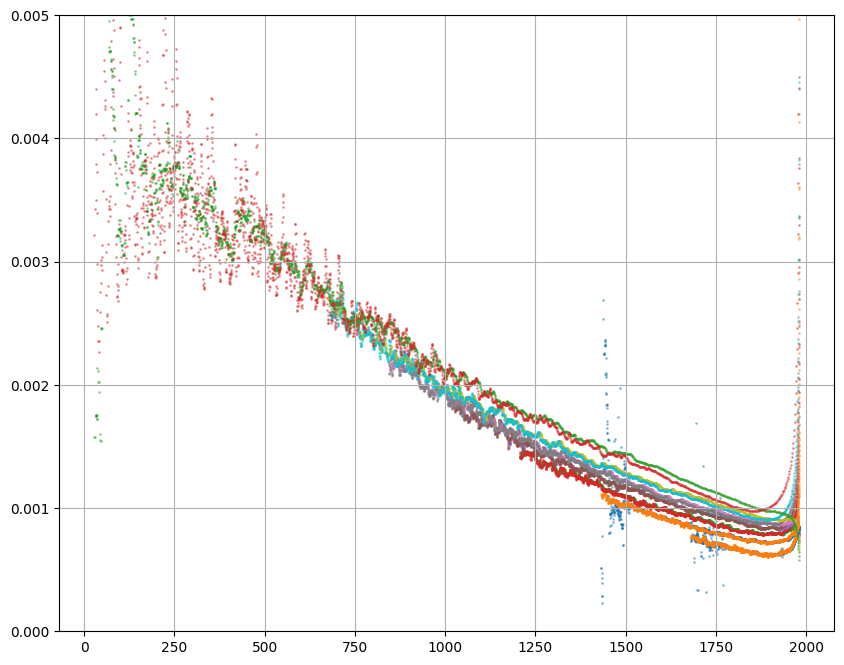

In [251]:
plt.figure(figsize=(10,8), dpi=100)
for item in items[:-1]:
    df_gam = item["gamma"]
    plt.scatter(df_gam["L"], df_gam["noneq"], s=1, alpha=0.4)
    plt.scatter(df_gam["L"], df_gam["fromL"], s=1, alpha=0.4)
    
    
# item = items[-2]
# df_gam = item["gamma"].loc[:300000]
# plt.scatter(df_gam["T"], df_gam["noneq"], s=1, alpha=0.4)
    
# plt.hlines(y=items[-1]["gamma"].loc[10000:]["noneq"].mean(),xmin=0.325,xmax=0.335)
T = np.linspace(0.12,0.3,100)
# plt.plot(T, T**2 * (0.0007/0.12**2))
plt.ylim(0,0.005)

In [230]:
df_gam = items[-2]["gamma"].loc[:3000000]

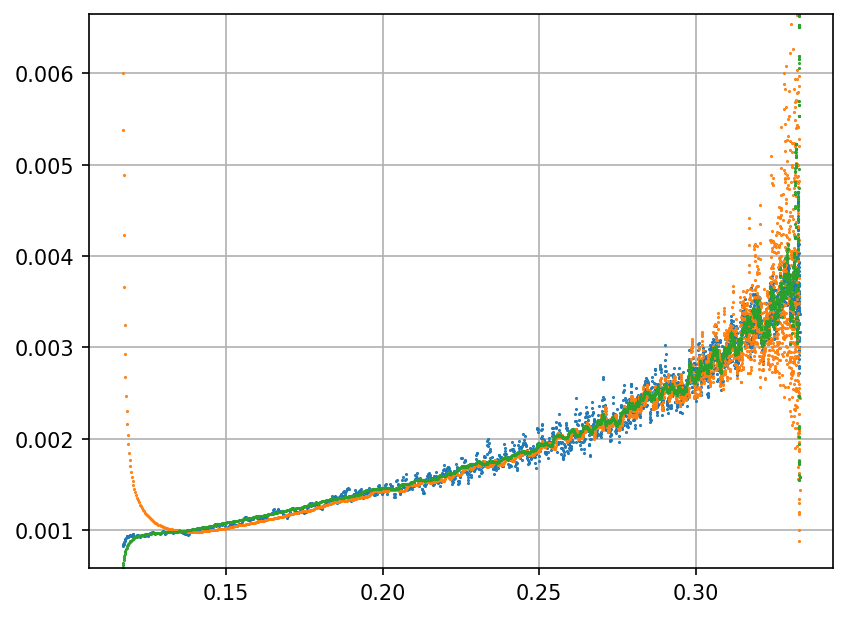

In [232]:
plt.ylim(df_gam["noneq"].min(), df_gam["noneq"].max())
plt.plot(df_gam["T"],df_gam["quasieq"], ".", ms=1)
plt.plot(df_gam["T"],df_gam["fromL"], ".", ms=1)
plt.plot(df_gam["T"],df_gam["noneq"], ".", ms=1)


In [172]:
df_gam["noneq"].iloc[0]

0.0008431737198643

<Axes: xlabel='time'>

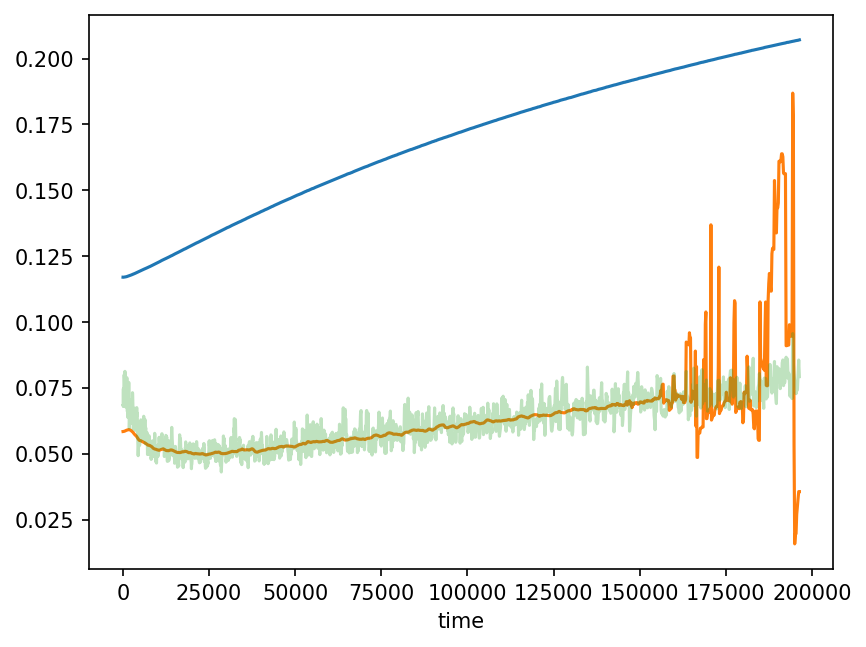

In [175]:
df_gam["T"].plot()
(df_gam["noneq"]/df_gam["noneq"].iloc[0] * df_gam["T"].iloc[0]/2).plot()
(df_gam["quasieq"]/df_gam["noneq"].iloc[0] * df_gam["T"].iloc[0]/2).plot(alpha=0.3)

<Axes: >

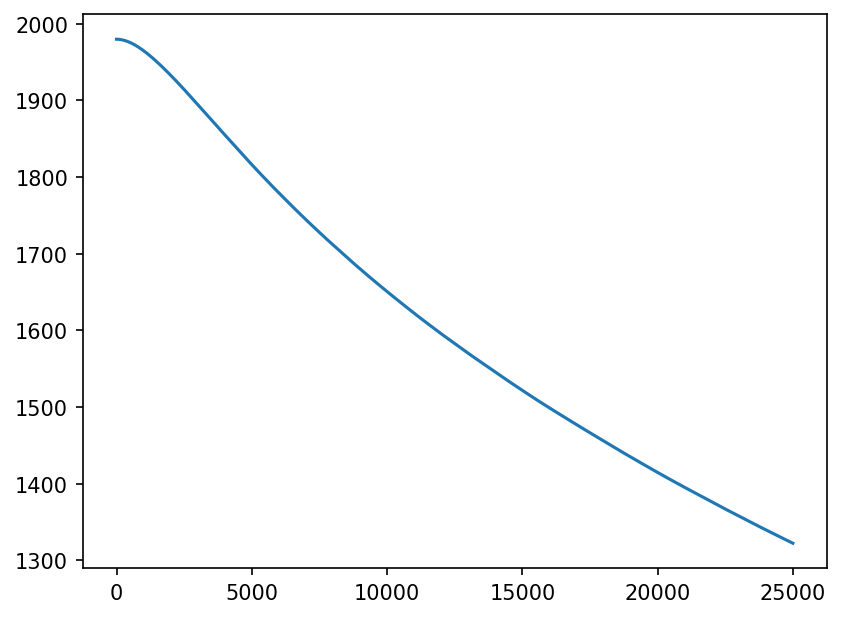

In [125]:
item["sim"]["L"].loc[:25000].plot()

In [169]:
for name, item in zip(names, items):
    df_gam = item["gamma"]
    df_gam.to_csv(os.path.join(mathematica_exports, name+".plus.csv"), header=False)

In [29]:
df_gam.to_csv("./test.csv", header=False)

In [34]:
files = os.listdir("/data/biophys/ashmat/outputs/")

In [40]:
files1 = [file for file in tqdm(files) if "14164438_1142" in file]

  0%|          | 0/394177 [00:00<?, ?it/s]

In [41]:
files1

[]